# Loading and Preprocessing the data

## Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing required libraries

In [5]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

##Loading the data

In [3]:
# Path to the folders
mpox_path = '/content/drive/MyDrive/mpox/Augmented Images/Augmented Images/Monkeypox_augmented'
non_mpox_path= '/content/drive/MyDrive/mpox/Augmented Images/Augmented Images/Others_augmented'
img_size = (200, 200)

# Listing all the files in the two folders
mpox_files = os.listdir(mpox_path)
non_mpox_files = os.listdir(non_mpox_path)

# Empty arrays to store the images and labels
images = []
labels = []

# Loading and preprocessing the images from mpox_files
for file in mpox_files:
    img_path = os.path.join(mpox_path, file)
    img = cv2.imread(img_path)
    img = cv2.resize(img,img_size)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_flatten = img_gray.flatten()
    images.append(img_flatten)
    labels.append(1)

# Loading and preprocessing the images from non_mpox_files
for file in non_mpox_files:
    img_path = os.path.join(non_mpox_path, file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, img_size) 
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_flatten = img_gray.flatten()
    images.append(img_flatten)
    labels.append(0)

## Assigning Variables, Normalising and Shuffling

In [6]:
# Convert the images and labels to numpy arrays
X = np.array(images)
y = np.array(labels)

# Normalizing the Vectors
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X and y vectors
print("X values:- \n", X)
print("\ny values:- \n", y)

# Shape of the dataset
print('\nX shape:', X.shape)
print('y shape:', y.shape)

# Binary class counts
counts = np.bincount(y)
print("class count: ", counts)

X values:- 
 [[-1.51543451 -1.52141135 -1.5243884  ... -1.54010267 -1.5261383
  -1.51450681]
 [-1.50252319 -1.50846669 -1.51143429 ... -1.54010267 -1.5261383
  -1.51450681]
 [ 1.57037237  1.59825202  1.61050561 ...  1.87868235  1.88294697
   1.87730567]
 ...
 [ 0.42126437  0.58856844  0.49645237 ...  1.19492534  1.50265061
   1.13407983]
 [ 0.08556989  0.08372665  0.08192093 ... -0.0495124  -0.04569888
  -0.02805512]
 [ 1.31214585  1.31346948  1.31256114 ...  1.68723039  1.65205275
   1.62055493]]

y values:- 
 [1 1 1 ... 0 0 0]

X shape: (3192, 40000)
y shape: (3192,)
class count:  [1764 1428]


#Shuffling and Splitting the dataset into Training and Testing sets

In [7]:
from sklearn.utils import shuffle

# Data Shuffling
X, y = shuffle(X, y, random_state=42)

from sklearn.model_selection import train_test_split

# Splittinf the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X and y vectors
print("X_train:- \n", X_train)
print("\nX_test:- \n", X_test)
print("\ny_train:- \n", y_train)
print("\ny_test:- \n", y_test)

# Shape of the dataset
print('\nX_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train:- 
 [[ 1.49290441  1.59825202  1.66232204 ... -1.12984847 -1.14584193
  -1.16316368]
 [-0.72784364 -0.73178701 -0.73418784 ... -0.88369595 -0.87420167
  -0.86587335]
 [-1.20556269 -1.21073948 -1.21348982 ... -0.24096437 -0.23584706
  -0.23075308]
 ...
 [ 0.51164365  0.44617717  0.3798654  ...  0.770996    0.78280392
   0.8097631 ]
 [-0.09518867 -0.11044327 -0.1382989  ...  0.12826442  0.09012125
   0.08005045]
 [ 0.22759448 -0.11044327  0.72962631 ... -1.06147277 -0.9013657
  -0.37939825]]

X_test:- 
 [[ 0.67949088  0.74390438  0.76848863 ... -0.03583726 -0.05928089
  -0.1226475 ]
 [-1.51543451 -1.52141135 -1.5243884  ... -1.54010267 -1.5261383
  -1.51450681]
 [-0.99898148 -0.96479091 -0.76009605 ...  0.92142254  1.24459236
   0.83678949]
 ...
 [-1.51543451 -1.52141135 -1.5243884  ... -1.54010267 -1.5261383
  -1.51450681]
 [ 0.49873232  0.49795581  0.48349826 ...  0.52484348  0.55190969
   0.56652555]
 [ 0.29215111  0.31673056  0.32804897 ...  0.14193956  0.15803132
   0.228695

#LOGISTIC REGRESSION

In [8]:
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model and fitting it to the training data
lr = LogisticRegression(random_state=42, max_iter=1500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1500, random_state=42)

In [9]:
# Making predictions on the testing data
y_pred_lr = lr.predict(X_test)
print('Predicted and actual values on y_test')
print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.reshape(len(y_test),1)),1))

Predicted and actual values on y_test
[[0 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [1 1]]


Accuracy: 0.837245696400626
Confusion Matrix:
[[322  39]
 [ 65 213]]


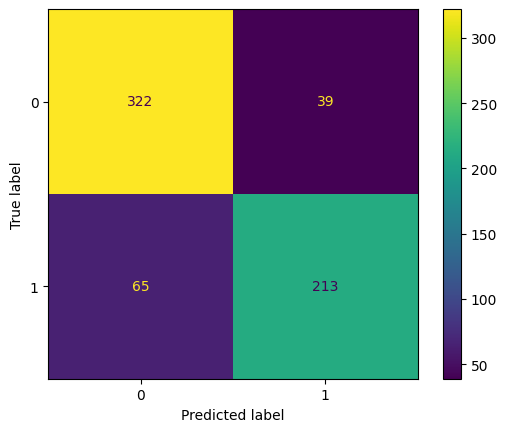

In [10]:
# Calculating the accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy:', accuracy_lr)

# Printing the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(cm_lr)

# Graphical display of the confusion matrix
ConfusionMatrixDisplay(cm_lr).plot()
plt.show()

#KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred_knn = knn.predict(X_test)
print('Predicted vs actual values on y_test')
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)),1))

Predicted vs actual values on y_test
[[0 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 1]]


Accuracy: 0.8450704225352113
Confusion Matrix:
[[334  27]
 [ 72 206]]


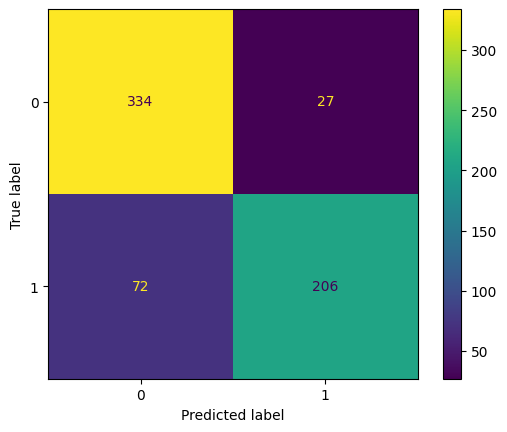

In [13]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy:', accuracy_knn)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(cm_knn)

ConfusionMatrixDisplay(cm_knn).plot()
plt.show()

#SVM

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [15]:
y_pred_svm = svm.predict(X_test)
print('Predicted vs actual values on y_test')
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

Predicted vs actual values on y_test
[[1 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [1 1]]


Accuracy: 0.8247261345852895
Confusion Matrix:
[[315  46]
 [ 66 212]]


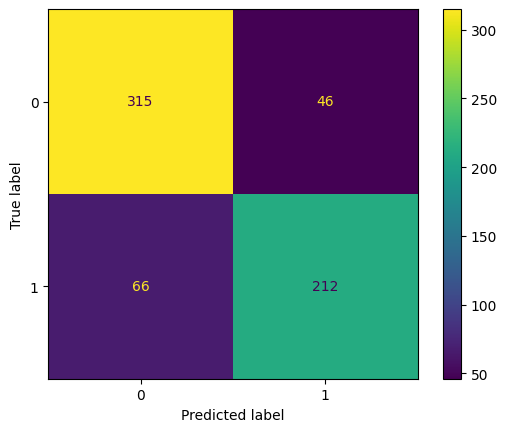

In [16]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy:', accuracy_svm)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(cm_svm)

ConfusionMatrixDisplay(cm_svm).plot()
plt.show()

#DECISION TREE

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [34]:
y_pred_dt = dt.predict(X_test)
print('Predicted vs actual values on y_test')
print(np.concatenate((y_pred_dt.reshape(len(y_pred_dt),1), y_test.reshape(len(y_test),1)),1))

Predicted vs actual values on y_test
[[0 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [0 1]]



Decision Tree:- 


[Text(0.5, 0.9, 'x[24653] <= -0.083\ngini = 0.495\nsamples = 2553\nvalue = [1403, 1150]'),
 Text(0.25, 0.7, 'x[23620] <= -1.051\ngini = 0.469\nsamples = 1153\nvalue = [433, 720]'),
 Text(0.125, 0.5, 'x[20952] <= -2.183\ngini = 0.299\nsamples = 323\nvalue = [59, 264]'),
 Text(0.0625, 0.3, 'x[10113] <= -1.373\ngini = 0.32\nsamples = 25\nvalue = [20, 5]'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.1875, 0.3, 'x[9529] <= 0.775\ngini = 0.227\nsamples = 298\nvalue = [39, 259]'),
 Text(0.15625, 0.1, 'gini = 0.17\nsamples = 277\nvalue = [26, 251]'),
 Text(0.21875, 0.1, 'gini = 0.472\nsamples = 21\nvalue = [13, 8]'),
 Text(0.375, 0.5, 'x[33470] <= -0.464\ngini = 0.495\nsamples = 830\nvalue = [374, 456]'),
 Text(0.3125, 0.3, 'x[20302] <= -1.065\ngini = 0.487\nsamples = 441\nvalue = [256, 185]'),
 Text(0.28125, 0.1, 'gini = 0.466\nsamples = 149\nvalue = [55, 94]'),
 Text(0.34375, 0.1, 'gini = 0.429\nsa

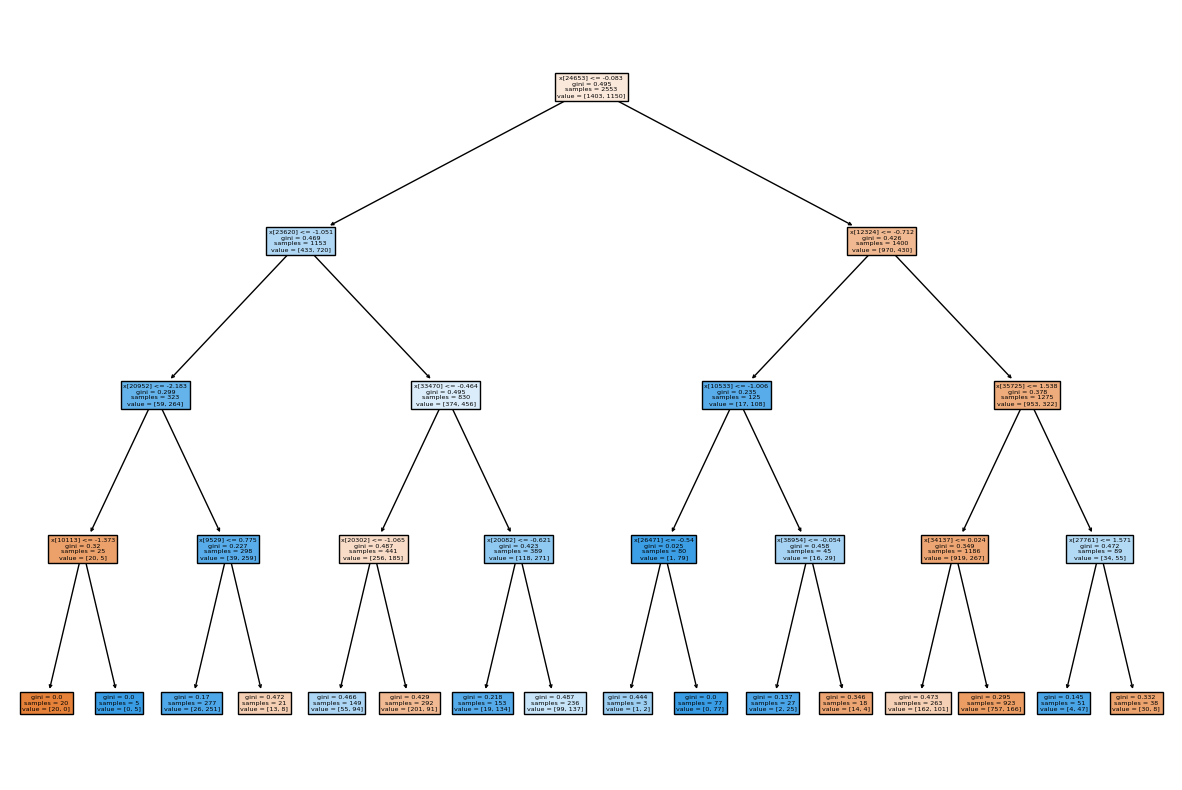

In [38]:
from sklearn import tree

# Plotting the Decision tree
print('\nDecision Tree:- ')
plt.figure(figsize=(15,10))
tree.plot_tree(dt, filled=True)

Accuracy: 0.6948356807511737
Confusion Matrix:
[[281  80]
 [115 163]]


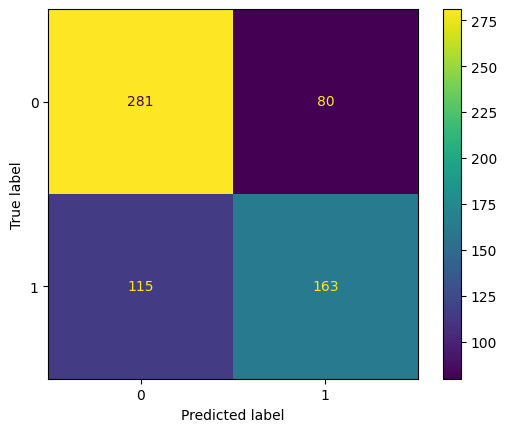

In [36]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy:', accuracy_dt)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:')
print(cm_dt)

ConfusionMatrixDisplay(cm_dt).plot()
plt.show()

#Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred_rf = rf.predict(X_test)
print('Predicted vs actual values on y_test')
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

Predicted vs actual values on y_test
[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 1]]


Accuracy: 0.8544600938967136
Confusion Matrix:
[[323  38]
 [ 55 223]]


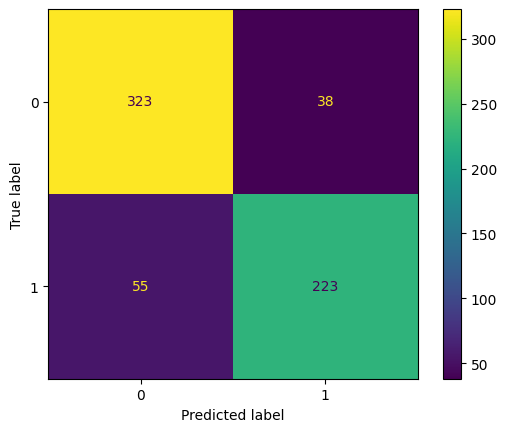

In [22]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(cm_rf)

ConfusionMatrixDisplay(cm_rf).plot()
plt.show()

#Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred_nb = nb.predict(X_test)
print('Predicted vs actual values on y_test')
print(np.concatenate((y_pred_nb.reshape(len(y_pred_nb),1), y_test.reshape(len(y_test),1)),1))

Predicted vs actual values on y_test
[[0 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 1]]


Accuracy: 0.6604068857589984
Confusion Matrix:
[[260 101]
 [116 162]]


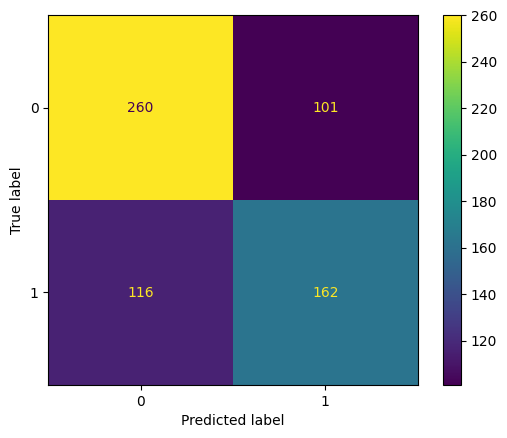

In [25]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy:', accuracy_nb)

cm_nb = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:')
print(cm_nb)

ConfusionMatrixDisplay(cm_nb).plot()
plt.show()

#Accuracy Comparision

In [37]:
import pandas as pd

accuracies = {'KNN': accuracy_knn,
              'Logistic Regression': accuracy_lr,
              'SVM': accuracy_svm,
              'Decision Tree': accuracy_dt,
              'Random Forest': accuracy_rf,
              'Naive Bayes': accuracy_nb}

df = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])

df = df.sort_values('Accuracy', ascending=False)

print(df)

max_accuracy = df.iloc[0]['Accuracy']
best_model = df.iloc[0]['Model']

print("\nMax accuracy is given by ML model", best_model, "with accuracy:", max_accuracy)

                 Model  Accuracy
4        Random Forest  0.854460
0                  KNN  0.845070
1  Logistic Regression  0.837246
2                  SVM  0.824726
3        Decision Tree  0.694836
5          Naive Bayes  0.660407

Max accuracy is given by ML model Random Forest with accuracy: 0.8544600938967136
